In [4]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm 
tqdm.pandas()

/Users/yanqiang/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
book = pd.read_csv('data/book.csv', encoding='ISO-8859-1')
user = pd.read_csv('data/user.csv', encoding='ISO-8859-1')

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

/Users/yanqiang/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Book

In [3]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


In [4]:
book.shape

(271379, 5)

In [5]:
book['ISBN'].nunique()

271379

In [6]:
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

#### 年份

In [7]:
book['Year-Of-Publication'].value_counts()[-10:]

1931    1
2021    1
2020    1
1928    1
1927    1
1926    1
1924    1
2012    1
2011    1
1900    1
Name: Year-Of-Publication, dtype: int64

可以看到有一个年份为字符串 Amit Chaudhuri，

0330482750,"Three Novels: ""A Strange and Sublime Address""; ""Afternoon Raag","Freedom Song""",Amit Chaudhuri,2001

In [8]:
book[book['Year-Of-Publication']=='Amit Chaudhuri']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
43665,0330482750,"Three Novels: ""A Strange and Sublime Address"";...","Freedom Song""",Amit Chaudhuri,2001


In [9]:
book.loc[book['ISBN']=='0330482750','Year-Of-Publication']=2001
book.loc[book['ISBN']=='0330482750','Book-Author']='Amit Chaudhuri'
book.loc[book['ISBN']=='0330482750','Publisher']='Vintage Books USA'
book[book['ISBN']=='0330482750']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
43665,0330482750,"Three Novels: ""A Strange and Sublime Address"";...",Amit Chaudhuri,2001,Vintage Books USA


In [10]:
book['Year-Of-Publication']=book['Year-Of-Publication'].astype(int)
book['Year-Of-Publication'].describe()

count    271379.000000
mean       1959.756050
std         258.011363
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

可以看到存在一些异常年份，2050，0

In [11]:
book[book['Year-Of-Publication']==2050]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
80267,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books
97830,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA


In [12]:
book.loc[book['Year-Of-Publication']==2050,'Year-Of-Publication']=book['Year-Of-Publication'].value_counts().index[0]

In [13]:
book[book['Year-Of-Publication']==2050]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [14]:
book[book['Year-Of-Publication']==0].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri


In [15]:
book.loc[book['Year-Of-Publication']==0,'Year-Of-Publication']=book['Year-Of-Publication'].value_counts().index[0]

In [16]:
book[book['Year-Of-Publication']==0].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


这些年份为0的数据集存在于测试集，所以不能删除

In [17]:
book[book['Year-Of-Publication']!=0].sort_values(by='Year-Of-Publication').head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
253767,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz
227544,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus
171826,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806,Reprint Services Corp
245622,0781268001,"Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...",Silas Weir Mitchell,1897,Reprint Services Corp
256461,B00009NDBF,Help Yourself: Celebrating the Rewards of Resi...,David J. Pelzer,1900,E P Dutton


In [18]:
book[book['Year-Of-Publication']!=0].sort_values(by='Year-Of-Publication').tail(20)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
147346,0743457226,Deep Waters,Jayne Ann Krentz,2010,Pocket
167400,0743474198,Heartbreaker,Julie Garwood,2010,Pocket
235440,0394172116,"Monkey (An Evergreen Book, E-112)",Cheng-En Wu,2011,Grove Press
12783,0380816792,A Rose in Winter,Kathleen E. Woodiwiss,2011,Harper Mass Market Paperbacks
199207,0307124533,Owl's Amazing but True No. 2,Owl Magazine,2012,Golden Books
30011,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard
92160,068107468X,Edgar Allen Poe Collected Poems,Edgar Allan Poe,2020,Bausch & Lombard
238832,068471941X,LOOK HOMEWARD ANGEL,T Wolfe,2020,Scribner Paper Fiction
183779,0590085417,Heidi,Johanna Spyri,2021,Scholastic
246858,0380000059,CLOUT,D. GIBBONS,2024,Avon


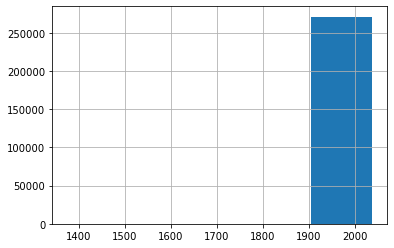

In [19]:
book['Year-Of-Publication'].hist(bins=5)
plt.show()
# sns.distplot(book['Year-Of-Publication'])
# plt.show()


In [20]:
book['Year-Of-Publication'].value_counts().index[0]

2002

TODO：异常年份填充思路：可使用对应作者平均年份去填充数据


### 出版商

In [21]:
book['Publisher'].isnull().sum()

2

使用众数填充出版商缺失值

In [22]:
book['Publisher'].fillna(value=book.Publisher.mode().values[0],inplace=True)
# Novelbooks
# book[book['Publisher'].isnull()]


In [23]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


## 训练集

In [72]:
def statics(data):
    stats = []
    for col in data.columns:
        stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0],
                      data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage_of_missing_values',
                                            'Percentage_of_values_in_the_biggest category', 'type'])
    stats_df.sort_values('Percentage_of_missing_values', ascending=False, inplace=True)
    return stats_df

In [73]:
statics(train)

,Feature,Unique_values,Percentage_of_missing_values,Percentage_of_values_in_the_biggest category,type
0,User-ID,26484,0.0,1.209166,int64
1,ISBN,226251,0.0,0.175642,object
2,Book-Rating,11,0.0,65.393081,int64


In [24]:
train.head()

,User-ID,ISBN,Book-Rating
0,8,0002005018,5
1,8,0374157065,0
2,8,0393045218,0
3,8,0399135782,0
4,8,0425176428,0


In [25]:
train.ISBN.value_counts()[:10]

0971880107    1296
0316666343     775
0385504209     579
0060928336     494
0312195516     441
0142001740     410
044023722X     400
0671027360     397
059035342X     385
067976402X     375
Name: ISBN, dtype: int64

### 评分

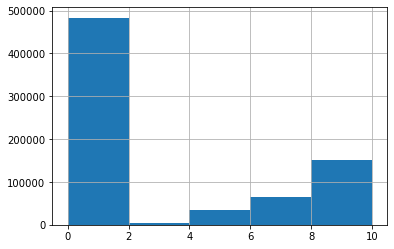

In [26]:
train['Book-Rating'].hist(bins=5)

In [27]:
train['Book-Rating'].describe()

count    737864.00000
mean          2.64871
std           3.79847
min           0.00000
25%           0.00000
50%           0.00000
75%           7.00000
max          10.00000
Name: Book-Rating, dtype: float64

In [28]:
train['Book-Rating'].value_counts()

0     482512
8      60088
10     48938
7      43333
9      41194
5      30827
6      20545
4       4830
3       3212
2       1481
1        904
Name: Book-Rating, dtype: int64

## 用户

In [29]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
user.isnull().sum()

User-ID               0
Location              0
Age              110762
locations_len         0
country               0
state                 0
city                  0
country_len           0
dtype: int64

In [30]:
user['User-ID'].nunique(),user.shape[0]

(278858, 278858)

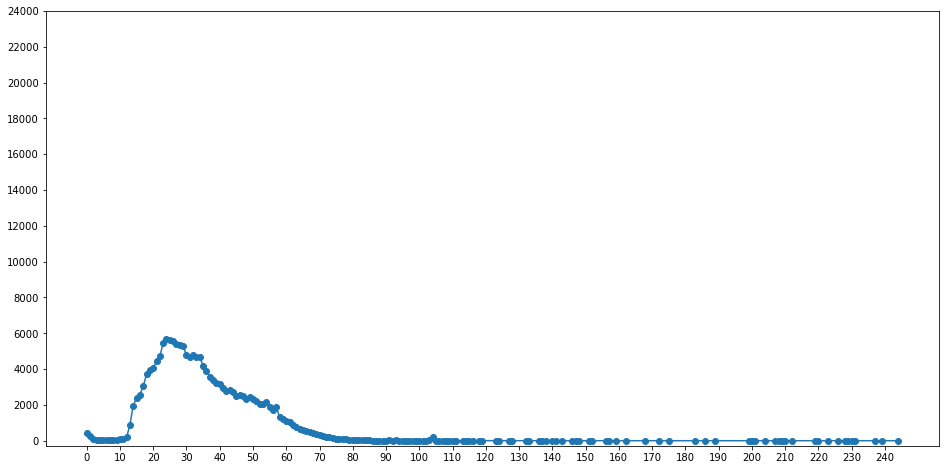

In [31]:
plt.figure(figsize=(16, 8))
plt.plot(user['Age'].value_counts().sort_index().index, user['Age'].value_counts().sort_index().values, 'o-')
plt.xticks(np.arange(0, 250, 10))
plt.yticks(np.arange(0, 25000, 2000))
plt.show()

In [32]:
user['Age'].value_counts()

24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
175.0       1
118.0       1
156.0       1
159.0       1
138.0       1
Name: Age, Length: 165, dtype: int64

In [33]:
user.loc[:,'Age']

0          NaN
1         18.0
2          NaN
3         17.0
4          NaN
          ... 
278853     NaN
278854    50.0
278855     NaN
278856     NaN
278857     NaN
Name: Age, Length: 278858, dtype: float64

In [34]:
user.iloc[:,user.columns != 'Age']

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"
...,...,...
278853,278854,"portland, oregon, usa"
278854,278855,"tacoma, washington, united kingdom"
278855,278856,"brampton, ontario, canada"
278856,278857,"knoxville, tennessee, usa"


In [35]:
user['Age'].mean()

34.75143370454978

Location

In [66]:
def get_locations(row):
        """
        用户 location 处理
        :param row:
        :return:
        """
        x = row['Location']
        locations = x.split(',')
        country, state, city = '', '', ''
        if len(locations) == 3:
            country = locations[2]
            if len(country)==0: #例如： weston, ,，将国家设置成美国
                country='usa'
            state = locations[1]
            if len(state)==0:
                state=locations[0]
            city = locations[0]
        elif len(locations) == 4:
            # eg：ray, michigan usa, ,
            # eg:ivanhoe, melbourne, , australia
            country = locations[3] # 
            if len(country)==0: #例如： weston, ,，将国家设置成美国
                country='usa'
            state = locations[1]
            if len(state)==0:
                state=locations[2]
            city = locations[0]
        elif len(locations) == 2:
            country = locations[1]
            state = locations[0]
            city = locations[0]
        elif len(locations) == 1:
            country = locations[0]
            state = locations[0]
            city = locations[0]
        else: # 大于4
            country = locations[-1]
            if len(country)==0: 
                country='usa'
            state = locations[1]
            if len(state)==0:
                state=locations[2]
            city = locations[0]
        return country, state, city

user['locations_len']=user['Location'].apply(lambda x:len(x.split(',')))
print(user['locations_len'].value_counts())
user[['country', 'state', 'city']] = user.progress_apply(lambda x: get_locations(x), axis=1,
                                                             result_type="expand")



  0%|          | 1265/278858 [00:00<02:02, 2263.87it/s]

3    277348
4      1417
5        72
6        11
7         4
9         2
8         2
2         1
1         1
Name: locations_len, dtype: int64


100%|██████████| 278858/278858 [00:38<00:00, 7250.67it/s] 


In [60]:
user['country'].value_counts()

 usa               139711
 canada             21658
 united kingdom     18538
 germany            17043
 spain              13147
                    ...  
 lkjlj                  1
 kern                   1
 rosario                1
 minnehaha              1
 australii              1
Name: country, Length: 709, dtype: int64

In [61]:
user['state'].value_counts()

 california                 19923
 n/a                        12529
 england                    10695
 ontario                     8747
 texas                       8406
                            ...  
 santiago de compostela         1
 michigan usa                   1
 cataluña-barcelona-            1
 euskal herria askatu!!!        1
 österreich                     1
Name: state, Length: 6338, dtype: int64

In [62]:
user['city'].value_counts()

london           4105
barcelona        2664
toronto          2342
madrid           1933
sydney           1884
                 ... 
neuffen             1
castano primo       1
béziers             1
fort hope           1
bafffa              1
Name: city, Length: 32770, dtype: int64

In [70]:
user['city_len']=user['city'].apply(lambda x:len(x))

In [71]:
user[user['city_len']==0]

,User-ID,Location,Age,locations_len,country,state,city,country_len,state_len,city_len
4968,4969,", ,",30.0,3,usa,,,1,1,0
8340,8341,", , portugal",NaN,3,portugal,,,1,1,0
9395,9396,", ,",44.0,3,usa,,,1,1,0
10786,10787,", , ireland",NaN,3,ireland,,,1,1,0
11852,11853,", , singapore",NaN,3,singapore,,,1,1,0
...,...,...,...,...,...,...,...,...,...,...
263613,263614,", , united kingdom",46.0,3,united kingdom,,,2,1,0
265540,265541,", ,",24.0,3,usa,,,1,1,0
271089,271090,", arizona, usa",24.0,3,usa,arizona,,1,8,0
273607,273608,", ,",NaN,3,usa,,,1,1,0


In [69]:
user[user['locations_len']>4]

,User-ID,Location,Age,locations_len,country,state,city,country_len,state_len
4468,4469,"guadalajara,, jalisco, mexico, mexico",36.0,5,mexico,jalisco,guadalajara,1,8
5641,5642,"mexico, city, mexico, city, mexico",54.0,5,mexico,city,mexico,1,5
6557,6558,"schiltigheim, france, alsace, bas rhin, france",31.0,5,france,france,schiltigheim,1,7
9695,9696,"mexico, city, mexico, city, mexico",37.0,5,mexico,city,mexico,1,5
12512,12513,"nanaimo, bc, v9v 1h4, british columbia, canada",NaN,5,canada,bc,nanaimo,1,3
...,...,...,...,...,...,...,...,...,...
273097,273098,"vashon, washington, wa,id,or,ak,bc, usa",NaN,8,usa,washington,vashon,1,11
273290,273291,"san ramon, alajuela, costa rica, san ramon de ...",29.0,5,costa rica,alajuela,san ramon,2,9
274054,274055,"enschede, budapest, overijssel, netherlands, h...",NaN,5,hungary,budapest,enschede,1,9
274065,274066,"51 tramo st., marulas,kawit,cavite, n/a, phili...",NaN,6,philippines,marulas,51 tramo st.,1,8


## 特征工程

In [36]:
book = pd.read_csv('data/book.csv', encoding='ISO-8859-1')

# 预处理
# 年份处理
book.loc[book['ISBN'] == '0330482750', 'Year-Of-Publication'] = 2002
book['Year-Of-Publication'] = book['Year-Of-Publication'].astype(int)
book.loc[book['Year-Of-Publication'] == 2050, 'Year-Of-Publication'] = \
    book['Year-Of-Publication'].value_counts().index[0]
book.loc[book['ISBN'] == '0330482750', 'Book-Author'] = 'Amit Chaudhuri'
book.loc[book['ISBN'] == '0330482750', 'Publisher'] = 'Vintage Books USA'
book['Publisher'].fillna(value=book.Publisher.mode().values[0], inplace=True)

user = pd.read_csv('data/user.csv', encoding='ISO-8859-1')
train = pd.read_csv('data/train.csv', )
test = pd.read_csv('data/test.csv')
train = pd.merge(train, user, how='left', on='User-ID')
train = pd.merge(train, book, how='left', on='ISBN')
test = pd.merge(test, user, how='left', on='User-ID')
test = pd.merge(test, book, how='left', on='ISBN')
train_size = len(train)
train.head()

/Users/yanqiang/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,0002005018,5,"timmins, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,8,0374157065,0,"timmins, ontario, canada",NaN,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
2,8,0393045218,0,"timmins, ontario, canada",NaN,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company
3,8,0399135782,0,"timmins, ontario, canada",NaN,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
4,8,0425176428,0,"timmins, ontario, canada",NaN,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
